In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv


In [2]:
import missingno as msno
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv")

In [4]:
df.head(5)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [5]:
#Reclassifying all objects into categorical data 
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = pd.Categorical(df[i])
    else:
        continue

In [6]:

#df["F.History"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df["Diabetes"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df["Thrombolysis"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
#df.cp=pd.Categorical(df.cp,categories=[1,2,3,4],ordered=True)
#df.cp = df.cp.map({1:"mild",2:"moderate",3:"severe",4:"rest"})

In [7]:
df.shape

(368, 60)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   Age                                                                                       368 non-null    int64   
 1   Age.Group                                                                                 368 non-null    category
 2   Gender                                                                                    368 non-null    category
 3   Locality                                                                                  368 non-null    category
 4   Marital status                                                                            368 non-null    category
 5   Life.Style                                        

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,368.0,54.293478,8.718158,24.00,50.750,55.000,60.25,77.00
F.History,368.0,0.195652,0.397242,0.00,0.000,0.000,0.00,1.00
Diabetes,368.0,0.461957,0.499229,0.00,0.000,0.000,1.00,1.00
BP,368.0,121.213315,24.539205,80.50,100.700,120.800,140.70,190.11
Thrombolysis,368.0,0.032609,0.177852,0.00,0.000,0.000,0.00,1.00
BGR,368.0,219.991848,139.337387,60.00,117.000,164.000,291.00,563.00
B.Urea,368.0,51.681522,62.582571,2.30,28.000,36.000,43.00,394.00
S.Cr,368.0,1.716902,3.609296,0.60,0.900,0.900,1.10,22.90
S.Sodium,368.0,138.019022,4.079879,129.00,135.000,138.000,141.00,146.00
S.Potassium,368.0,4.210870,0.394984,3.30,3.900,4.200,4.40,5.30


<AxesSubplot:>

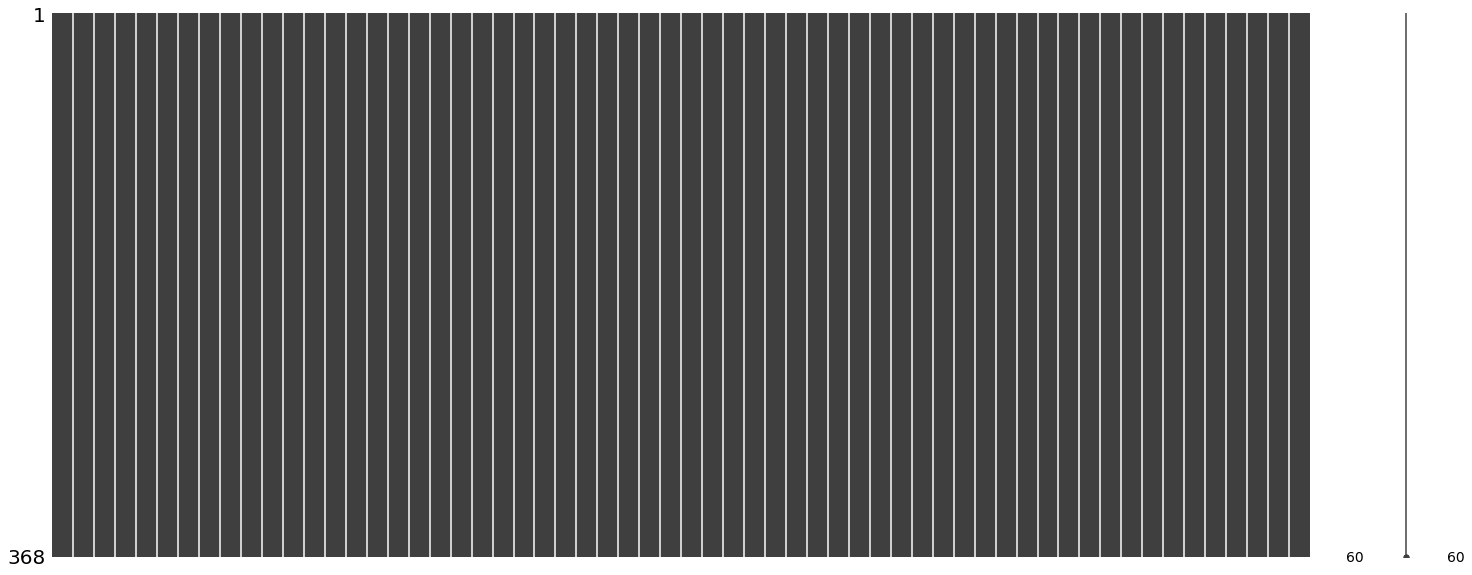

In [10]:
msno.matrix(df)

In [11]:
px.pie(df,values=df["Age.Group"].value_counts(),names=df["Age.Group"].unique(), title="AGE GROUP DISTRIBUTION")